# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Downloads/wdbc.data')
df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [3]:
df.tail()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
567,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [4]:
col =  ['ID', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
        'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 
        'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
        'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 
        'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [5]:
df.columns = col

In [6]:
df.head()

,ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [7]:
df.drop(columns='ID', inplace=True)

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [9]:
df.shape

(568, 31)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,568.0,14.120491,3.523416,6.981000,11.697500,13.355000,15.780000,28.11000
texture_mean,568.0,19.305335,4.288506,9.710000,16.177500,18.855000,21.802500,39.28000
perimeter_mean,568.0,91.914754,24.285848,43.790000,75.135000,86.210000,103.875000,188.50000
area_mean,568.0,654.279754,351.923751,143.500000,420.175000,548.750000,782.625000,2501.00000
smoothness_mean,568.0,0.096321,0.014046,0.052630,0.086290,0.095865,0.105300,0.16340
compactness_mean,568.0,0.104036,0.052355,0.019380,0.064815,0.092525,0.130400,0.34540
concavity_mean,568.0,0.088427,0.079294,0.000000,0.029540,0.061400,0.129650,0.42680
concave_points_mean,568.0,0.048746,0.038617,0.000000,0.020310,0.033455,0.073730,0.20120
symmetry_mean,568.0,0.181055,0.027319,0.106000,0.161900,0.179200,0.195625,0.30400
fractal_dimension_mean,568.0,0.062770,0.007035,0.049960,0.057697,0.061515,0.066120,0.09744


In [11]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_points_worst

In [13]:
df.diagnosis.value_counts()

B    357
M    211
Name: diagnosis, dtype: int64

In [14]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0}) #malignant = 1, benign = 0

In [15]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


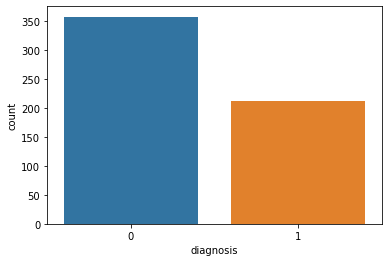

In [16]:
sns.countplot(x='diagnosis', data=df) #benign = 0, malignant = 1
plt.show()

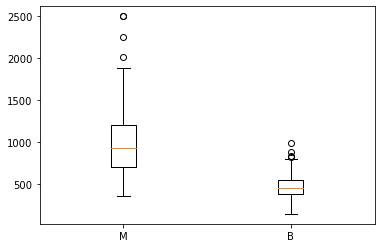

In [17]:
diagnosis_m = df.loc[df['diagnosis']==1, 'area_mean'].values
diagnosis_b = df.loc[df['diagnosis']==0, 'area_mean'].values
plt.boxplot([diagnosis_m,diagnosis_b], labels=['M','B']);

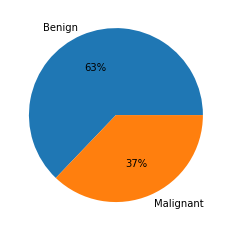

In [18]:
x = df.diagnosis.value_counts()
labels = ['Benign' ,'Malignant']
plt.pie(x, labels =labels, autopct = '%.0f%%')
plt.show()

<AxesSubplot:>

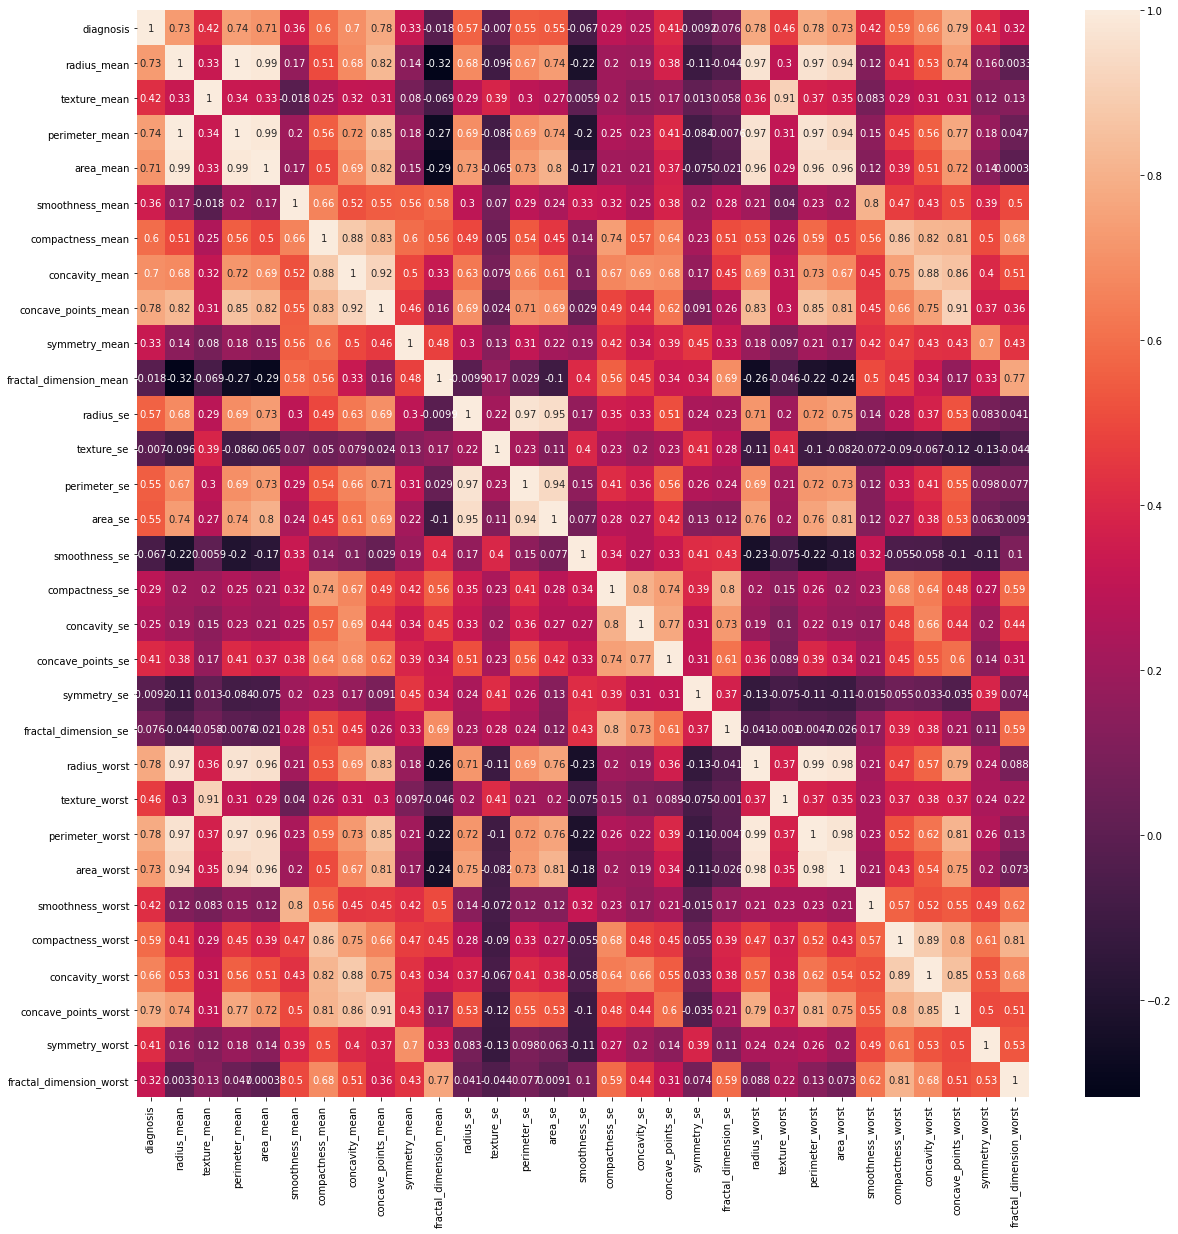

In [19]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

# Menghilangkan outliers

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Ukuran data sebelum dibuang
print('Shape awal: ', df.shape)

# Removing outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Ukuran data sesudah dibuang
print('Shape akhir: ', df.shape)

Shape awal:  (568, 31)
Shape akhir:  (397, 31)


# Dataset Splitting

In [21]:
X = df.drop(columns=['diagnosis'])
y = df.diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((317, 30), (80, 30), (317,), (80,))

# Logistic Regression

No Scaling

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(f'score data train: {lr.score(X_train, y_train)*100:.2f}')
print(f'score data test: {lr.score(X_test, y_test)*100:.2f}')

score data train: 94.32
score data test: 93.75


<AxesSubplot:>

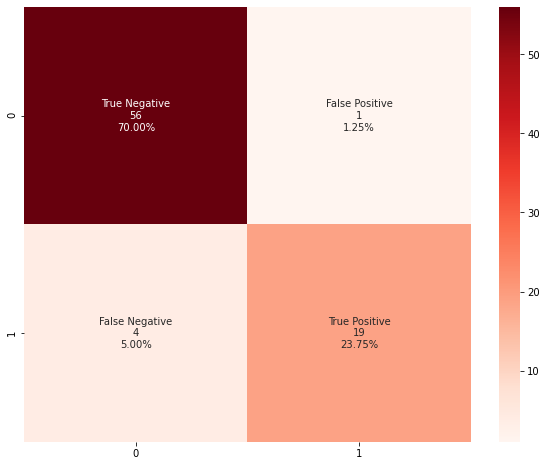

In [24]:
lr_predict = lr.predict(X_test)

cm = confusion_matrix(y_test, lr_predict)

class_names=["True Negative","False Positive","False Negative","True Positive"]
class_counts=["{0:0.0f}".format(value) for value in cm.flatten()]
class_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(class_names,class_counts,class_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=labels,fmt='',cmap='Reds')

With Scaling

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

print(f'score data train: {lr.score(X_train_scaled, y_train)*100:.2f}')
print(f'score data test: {lr.score(X_test_scaled, y_test)*100:.2f}')

score data train: 98.42
score data test: 98.75


<AxesSubplot:>

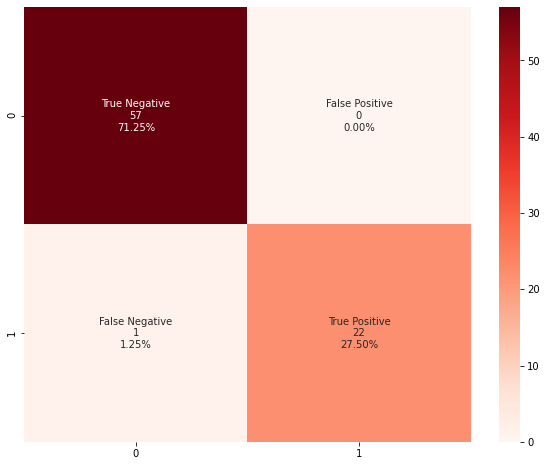

In [27]:
lr_predict = lr.predict(X_test_scaled)

cm = confusion_matrix(y_test, lr_predict)

class_names=["True Negative","False Positive","False Negative","True Positive"]
class_counts=["{0:0.0f}".format(value) for value in cm.flatten()]
class_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(class_names,class_counts,class_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=labels,fmt='',cmap='Reds')

# SVC

In [28]:
from sklearn.svm import SVC

No Scaling

In [29]:
svc = SVC()
svc.fit(X_train, y_train)

print(f'score data train: {svc.score(X_train, y_train)*100:.2f}')
print(f'score data test: {svc.score(X_test, y_test)*100:.2f}')

score data train: 92.43
score data test: 92.50


<AxesSubplot:>

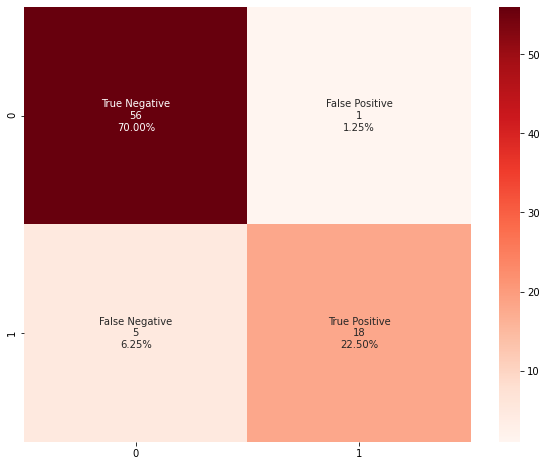

In [30]:
svc_predict = svc.predict(X_test)

cm = confusion_matrix(y_test, svc_predict)

class_names=["True Negative","False Positive","False Negative","True Positive"]
class_counts=["{0:0.0f}".format(value) for value in cm.flatten()]
class_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(class_names,class_counts,class_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=labels,fmt='',cmap='Reds')

With Scaling

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print(f'score data train: {svc.score(X_train_scaled, y_train)*100:.2f}')
print(f'score data test: {svc.score(X_test_scaled, y_test)*100:.2f}')

score data train: 98.42
score data test: 98.75


<AxesSubplot:>

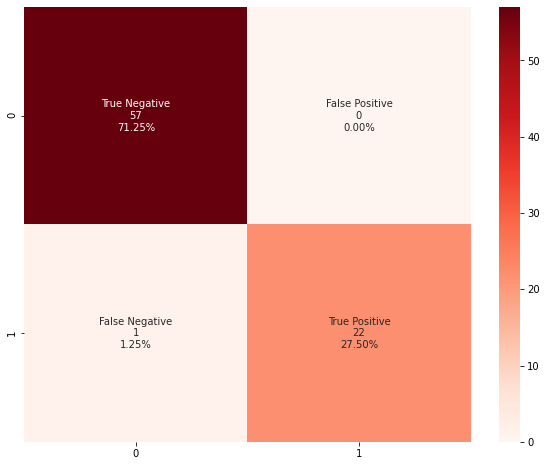

In [33]:
svc_predict = svc.predict(X_test_scaled)

cm = confusion_matrix(y_test, svc_predict)

class_names=["True Negative","False Positive","False Negative","True Positive"]
class_counts=["{0:0.0f}".format(value) for value in cm.flatten()]
class_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(class_names,class_counts,class_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=labels,fmt='',cmap='Reds')

# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

print(f'score data train: {rfc.score(X_train, y_train)*100:.2f}')
print(f'score data test: {rfc.score(X_test, y_test)*100:.2f}')

score data train: 100.00
score data test: 92.50


<AxesSubplot:>

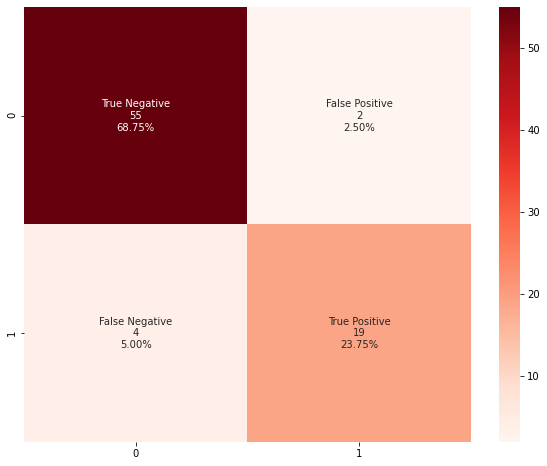

In [36]:
rfc_predict = rfc.predict(X_test)

cm = confusion_matrix(y_test, rfc_predict)

class_names=["True Negative","False Positive","False Negative","True Positive"]
class_counts=["{0:0.0f}".format(value) for value in cm.flatten()]
class_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(class_names,class_counts,class_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=labels,fmt='',cmap='Reds')

With Scaling

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)

print(f'score data train: {rfc.score(X_train_scaled, y_train)*100:.2f}')
print(f'score data test: {rfc.score(X_test_scaled, y_test)*100:.2f}')

score data train: 100.00
score data test: 91.25


<AxesSubplot:>

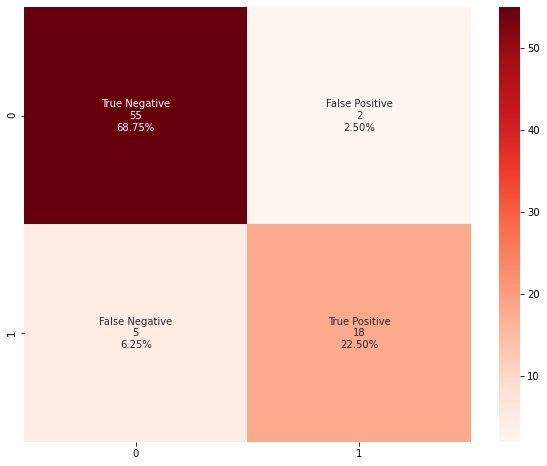

In [39]:
rfc_predict = rfc.predict(X_test_scaled)

cm = confusion_matrix(y_test, rfc_predict)

class_names=["True Negative","False Positive","False Negative","True Positive"]
class_counts=["{0:0.0f}".format(value) for value in cm.flatten()]
class_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(class_names,class_counts,class_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=labels,fmt='',cmap='Reds')

# XGBoost

In [40]:
from xgboost import XGBClassifier

In [41]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

print(f'score data train: {xgb.score(X_train, y_train)*100:.2f}')
print(f'score data test: {xgb.score(X_test, y_test)*100:.2f}')

[20:17:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score data train: 100.00
score data test: 96.25


<AxesSubplot:>

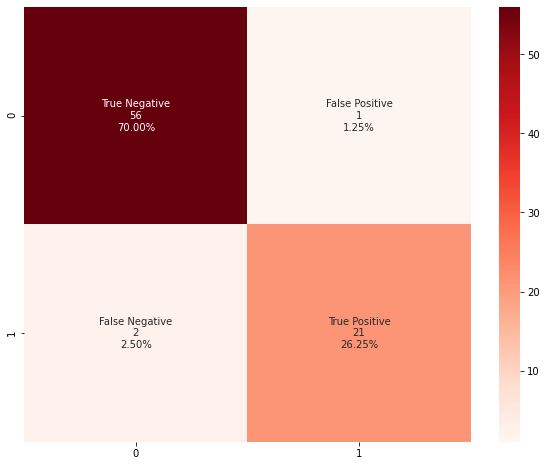

In [42]:
xgb_predict = xgb.predict(X_test)

cm = confusion_matrix(y_test, xgb_predict)

class_names=["True Negative","False Positive","False Negative","True Positive"]
class_counts=["{0:0.0f}".format(value) for value in cm.flatten()]
class_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(class_names,class_counts,class_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=labels,fmt='',cmap='Reds')

In [43]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)

print(f'score data train: {xgb.score(X_train_scaled, y_train)*100:.2f}')
print(f'score data test: {xgb.score(X_test_scaled, y_test)*100:.2f}')

[20:17:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score data train: 100.00
score data test: 96.25


<AxesSubplot:>

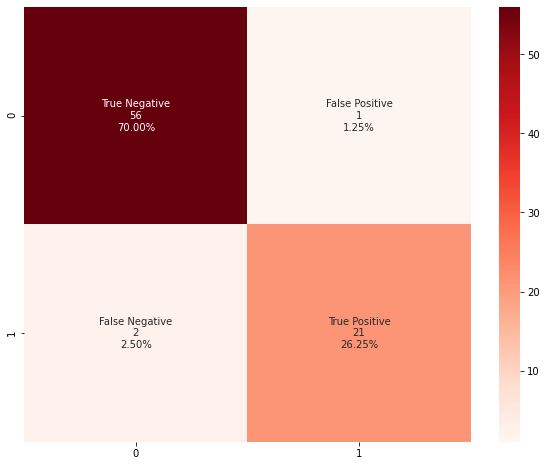

In [45]:
xgb_predict = xgb.predict(X_test_scaled)

cm = confusion_matrix(y_test, xgb_predict)

class_names=["True Negative","False Positive","False Negative","True Positive"]
class_counts=["{0:0.0f}".format(value) for value in cm.flatten()]
class_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(class_names,class_counts,class_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=labels,fmt='',cmap='Reds')